In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
dayTrain_folder = "dayTrain/"
filename = "imageDataset.csv"

In [3]:
df = pd.read_csv(dayTrain_folder+filename)
df.head()

,filename,target,x1,y1,x2,y2,p1,p2,p3,p4,...,p1491,p1492,p1493,p1494,p1495,p1496,p1497,p1498,p1499,p1500
0,dayClip1--00000.jpg,go,698,333,710,358,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,dayClip1--00000.jpg,go,846,391,858,411,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,dayClip1--00001.jpg,go,698,337,710,357,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,dayClip1--00001.jpg,go,847,390,859,410,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,dayClip1--00002.jpg,go,698,331,710,356,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
# drop warning class
# df = df.drop(df[df["target"]=="warning"].index)

In [5]:
X = df.drop(["filename", "target", "x1", "y1", "x2", "y2"], axis=1)
y = df["target"]

<BarContainer object of 3 artists>

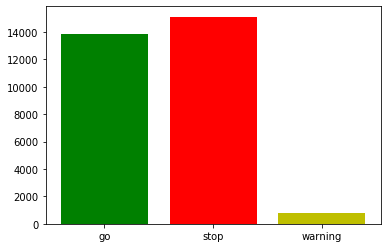

In [6]:
index, counts = np.unique(y, return_counts=True)
colors = ["g", "r", "y"]
plt.bar(index, counts, color=colors)

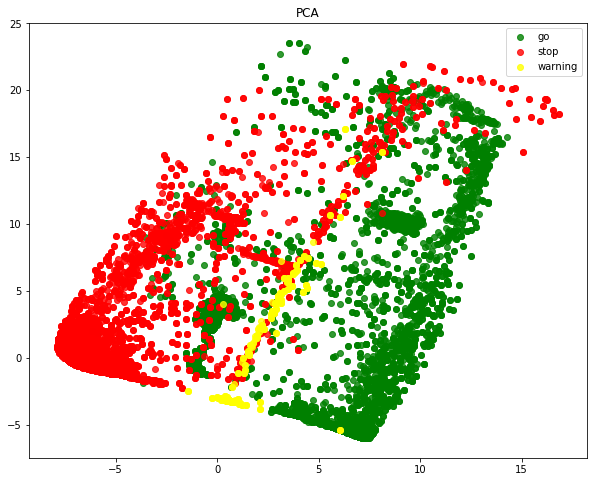

In [7]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
y_r = pd.Series(y.values.ravel())

colors = ['green', 'red', 'yellow']
plt.figure(figsize=(10,8))
plt.scatter(X_r[y_r == "go", 0], X_r[y_r == "go", 1], color=colors[0], alpha=.8, label="go")
plt.scatter(X_r[y_r == "stop", 0], X_r[y_r == "stop", 1], color=colors[1], alpha=.8, label="stop")
plt.scatter(X_r[y_r == "warning", 0], X_r[y_r == "warning", 1], color=colors[2], alpha=.8, label="warning")
plt.legend(loc="best")
plt.title('PCA')
plt.show()

### Train & Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [12]:
kernel = 'poly'
C = 1
gamma = 10
degree = 3
svc = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree).fit(X_train, y_train.values.ravel())

In [13]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

          go       1.00      1.00      1.00      4590
        stop       1.00      1.00      1.00      4949
     warning       1.00      0.99      0.99       262

    accuracy                           1.00      9801
   macro avg       1.00      1.00      1.00      9801
weighted avg       1.00      1.00      1.00      9801

